<a href="https://colab.research.google.com/github/chitranshi135/AI_KBC_prob/blob/main/KBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Iterations:  73597
VALUE FUNCTION:
{0: 9481.077820872028, 1: 10394.549992123864, 2: 12636.061019552071, 3: 18165.24867603768, 4: 26948.773086022764, 5: 51482.170372127825, 6: 74996.21953349416, 7: 164797.05346210062, 8: 190130.97354729625, 9: 124880.2733823972}
TIMES ENTERED:
{0: 100.0, 1: 98.98908922918054, 2: 88.99411660801391, 3: 71.05316792804055, 4: 49.79686672011087, 5: 29.87621778061606, 6: 15.064472736660461, 7: 6.130684674647065, 8: 1.822085139339919, 9: 0.38996154734567984}
EXPECTED REWARD:  98075.75967391435


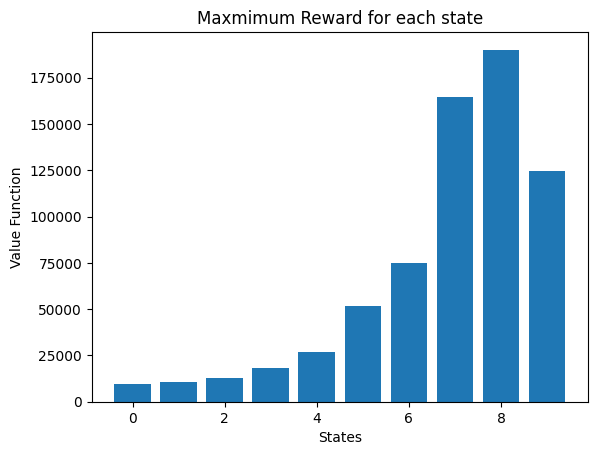

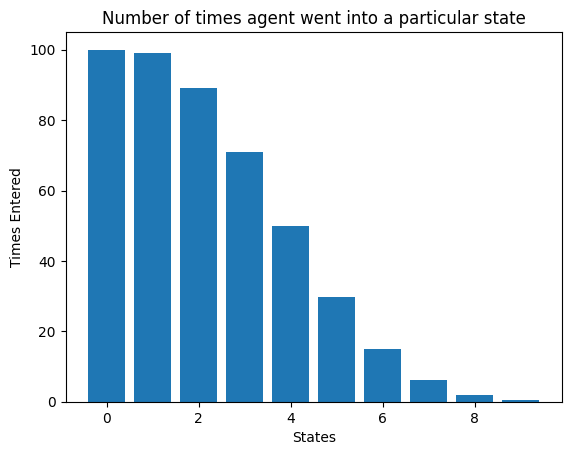

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class ZORO_NODE:
    def __init__(self, reward, correctProbability):
        self.REWARD = reward
        self.PROBABILITY = correctProbability
        self.next = None

class ZORO_AGENT:
    def __init__(self):
        self.N = 10
        self.THETA = 0.0001
        self.DISCOUNT_FACTOR = 0.9
        self.ACTIONS = ["CONTINUE", "QUIT"]
        
        REWARDS = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
        CORRECT_ANSWER_PROBABILITY = [0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
        
        START_NODE = ZORO_NODE(-1,0)
        TEMP = START_NODE
        
        for i in range(self.N):  
            TEMP.next = ZORO_NODE(REWARDS[i],CORRECT_ANSWER_PROBABILITY[i])
            TEMP = TEMP.next
        
        self.START_STATE = START_NODE.next        


class MDP_SOLUTION:
    def __init__(self):
        self.agent = ZORO_AGENT()
        self.VALUE_FUNCTION = {s: 0 for s in range(self.agent.N)}
        self.ITERATIONS = 0
        self.TIMES_ENTERED = {s: 0 for s in range(self.agent.N)}
        self.TERMINATOR = False
        self.PLOT_STATES = [x for x in range(self.agent.N)]
    
    def helper(self, state, iteration):
        if(state == None): return 0
        self.TIMES_ENTERED[iteration] += 1
    
        OLD_VALUE = self.VALUE_FUNCTION[iteration]
        REWARD_ACHIEVED = 0
        if iteration == 0:
            QUIT_REWARD = 0
        else:
            QUIT_REWARD = self.VALUE_FUNCTION[iteration-1]
        
        ZORO_ANSWER = np.random.rand()
        
        if ZORO_ANSWER <= state.PROBABILITY:
            REWARD_ACHIEVED = state.PROBABILITY * (state.REWARD + (self.agent.DISCOUNT_FACTOR * self.helper(state.next, iteration+1)))
            self.VALUE_FUNCTION[iteration] = (self.VALUE_FUNCTION[iteration] * self.TIMES_ENTERED[iteration] + REWARD_ACHIEVED)/(self.TIMES_ENTERED[iteration]+1)
            
            if(abs(self.VALUE_FUNCTION[iteration] - OLD_VALUE) < self.agent.THETA):
                self.TERMINATOR = True

        return max(QUIT_REWARD, REWARD_ACHIEVED)
    
    def solver(self):
        while self.TERMINATOR == False:
            self.ITERATIONS += 1
            HEAD = self.agent.START_STATE
            self.helper(HEAD, 0)
        
        print("Total Iterations: ", self.ITERATIONS)
        print("VALUE FUNCTION:")
        print(self.VALUE_FUNCTION)
        
        for i in range(self.agent.N):
            self.TIMES_ENTERED[i] = (self.TIMES_ENTERED[i] / self.ITERATIONS) * 100
        
        print("TIMES ENTERED:")
        print(self.TIMES_ENTERED)
        
        EXPECTATION = 0
        for i in range(self.agent.N):
            EXPECTATION = EXPECTATION + ((self.TIMES_ENTERED[i]/100) * self.VALUE_FUNCTION[i])
        
        print("EXPECTED REWARD: ", EXPECTATION)
        plt.bar(self.PLOT_STATES, self.VALUE_FUNCTION.values())
        plt.xlabel('States')
        plt.ylabel('Value Function')
        plt.title('Maxmimum Reward for each state')
        plt.show()
        
        plt.bar(self.PLOT_STATES, self.TIMES_ENTERED.values())
        plt.xlabel('States')
        plt.ylabel('Times Entered')
        plt.title('Number of times agent went into a particular state')
        plt.show()

MDP_SOLUTION().solver()